In [228]:
import matplotlib.pyplot as plt
from thinkbayes2 import Suite, Cdf
import thinkplot

# Estimation

Three step strategy for Bayesian estimation problems:

1. Choose a representation for the hypothesis
2. Choose a representation for the data
3. Write the likelihood function

## The dice problem

> Suppose I have a box of dice that contains a 4-sided die, a 6-sided die, an 8-sided  die, a 12-sided  die, and a  20-sided die. If you have ever played Dungeons & Dragons, you know what I am talking about. Suppose I select a die from the box at random, roll it, and get a 6. What is the probability that I rolled each die?

In [45]:
class Dice(Suite):
    
    def Likelihood(self, data, hypo):
        if hypo < data: # can't get a probability for a number that is greater than the max number of a single die
            return 0.0
        else:
            return 1.0/hypo

In [57]:
# Choose a representation fo the hypothesis
suite = Dice([4, 6, 8, 12, 20])

In [58]:
# We role a six
suite.Update(6)

0.08499999999999999

In [59]:
suite.Print()

4 0.0
6 0.3921568627450981
8 0.29411764705882354
12 0.19607843137254904
20 0.11764705882352944


In [60]:
for roll in [8, 6, 4, 1, 8, 7]:
    suite.Update(roll)

suite.Print()

4 0.0
6 0.0
8 0.9432484536722124
12 0.0552061280612909
20 0.001545418266496554


In [44]:
# Double checking
# We wish to calculate p(B|A) where B is rolling an n-sided die and A is rolled a six
#
# p(B|A) = p(B)*p(A|B)/p(A)
#
# Where:
#       p(B) is the probability of rolling an n-sided die
#       p(Bc) is the probability of not rolling an n-sided die
#       p(A|B) is the probability of rolling a six with an n-sided die
#       p(A|Bc) is the probability of rolling a six without rolling an n-sided die
#       p(A) is the probability of rolling a six: p(A|B)p(B) + p(A|Bc)p(Bc)
#

prior = {4: 1/5., 6: 1/5., 8: 1/5., 12: 1/5., 20: 1/5.} # Selecting a specific die at random
likelihood = {4: 0.0, 6: 1/6., 8: 1/8., 12: 1/12, 20: 1/20.}

def prob_rolling_six(lik):
    p = 0.0
    for l in lik.values():
        p += 1/5.*l
    return p

for die in likelihood.keys():
    cond_prob = prior[die]*likelihood[die]/prob_rolling_six(likelihood)
    print(f'{die} {cond_prob}')

4 0.0
6 0.3921568627450981
8 0.2941176470588236
12 0.19607843137254904
20 0.11764705882352945


## The locomotive problem
> “A railroad numbers its locomotives in order 1..N. One day you see a locomotive with the number 60. Estimate how many loco-motives the railroad has.”

In [215]:
# What did we know about N before we saw the data?
# N is the number of locomotives a railroad has. N can be any positive integer (prior)

# For a given value of N, what is the likelihood of seeing the data (60)?
# The probability of seeing 60 is 0 for all N < 60, and 1/N for all N >= 60

class Railroad(Suite):
    
    def Likelihood(self, data, hypo):
        if hypo < data:
            return 0.0
        else:
            return 1/hypo

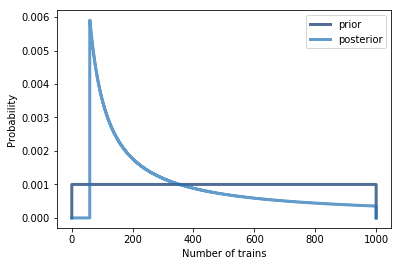

In [216]:
thinkplot.PrePlot(num=2)

suite = Railroad(range(1,1001))
suite.label = 'prior'
thinkplot.Pmf(suite)

for data in [60]:
    suite.Update(data)
suite.label = 'posterior'
thinkplot.Pmf(suite)

thinkplot.Config(xlabel='Number of trains',
                 ylabel='Probability')

In [217]:
print(suite.Mean())

333.41989326371095


In [218]:
# Now let's assume a power law distribution prior
class PowerRailroad(Railroad):
    
    def __init__(self, hypos, alpha=1.0):
        Pmf.__init__(self)
        for hypo in hypos:
            self[hypo] = hypo**(-1*alpha)
        self.Normalize()

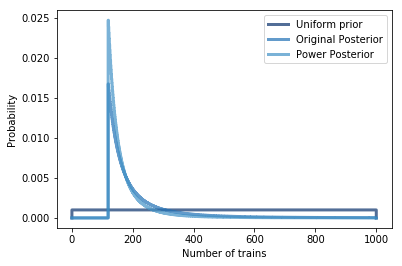

In [222]:
thinkplot.PrePlot(num=4)

suite = Railroad(range(1,1001))
train = PowerRailroad(range(1,1001))
suite.label = 'Uniform prior'
train.label = 'Power prior'
thinkplot.Pmf(suite)
#thinkplot.Pmf(train)

for data in [60, 90, 120]:
    suite.Update(data)
    train.Update(data)
suite.label = 'Original Posterior'
train.label = 'Power Posterior'

thinkplot.Pmf(suite)
thinkplot.Pmf(train)

thinkplot.Config(xlabel='Number of trains',
                 ylabel='Probability')

In [225]:
interval = train.Percentile(5), train.Percentile(95)

In [226]:
print(interval)

(122, 321)


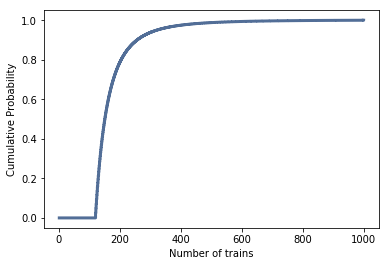

In [229]:
cdf = Cdf(train)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Number of trains',
                 ylabel='Cumulative Probability',
                 legend=False)

## Exercises

**Exercise:** To write a likelihood function for the locomotive problem, we had
to answer this question:  "If the railroad has `N` locomotives, what
is the probability that we see number 60?"

The answer depends on what sampling process we use when we observe the
locomotive.  In this chapter, I resolved the ambiguity by specifying
that there is only one train-operating company (or only one that we
care about).

But suppose instead that there are many companies with different
numbers of trains.  And suppose that you are equally likely to see any
train operated by any company.
In that case, the likelihood function is different because you
are more likely to see a train operated by a large company.

As an exercise, implement the likelihood function for this variation
of the locomotive problem, and compare the results.

In [231]:
# We are supposing now that there are many companies with different numbers of trains. We are equally likely
# to see any train operated by any company

# The likelihood is different because you are more likely to see a train operated by a large company

# Simplify: Suppose there is a town where train company A has N locomotives and company B has M locomotives.
# The probability of seeing a train from company A is N / (N + M). To see a specific train (say, 60) from
# company A, the probability is 1 / N.

# Therefore the probability of seeing a train from company A is p(A)p(60|A) or 1 / (N + M).

# For a given value of N, what is the likelihood of seeing the data (60)?
# The probability of seeing 60 is 0 for all N < 60, and 1/N for all N >= 60

**Exercise:** Suppose I capture and tag 10 rock hyraxes.  Some time later, I capture another 10 hyraxes and find that two of them are already tagged.  How many hyraxes are there in this environment?

As always with problems like this, we have to make some modeling assumptions. 

1) For simplicity, you can assume that the environment is reasonably isolated, so the number of hyraxes does not change between observations.

2) And you can assume that each hyrax is equally likely to be captured during each phase of the experiment, regardless of whether it has been tagged.  In reality, it is possible that tagged animals would avoid traps in the future, or possible that the same behavior that got them caught the first time makes them more likely to be caught again.  But let's start simple.

I suggest the following notation:

*  `N`: total population of hyraxes 
*  `K`: number of hyraxes tagged in the first round 
*  `n`: number of hyraxes caught in the second round
*  `k`: number of hyraxes in the second round that had been tagged

So `N` is the hypothesis and `(K, n, k)` make up the data.  The probability of the data, given the hypothesis, is the probability of finding `k` tagged hyraxes out of `n` if (in the population) `K` out of `N` are tagged. 

If you are familiar with the hypergeometric distribution, you can use the hypergeometric PMF to compute the likelihood function.  Otherwise, you can figure it out using combinatorics.

In [237]:
# Okay

# N is the hypothesis (The total population of hyraxes)

# (K, n, k) is the data, where K is the number of hyraxes tagged in round 1, n is the number of hyraxes in round 2,
# and k is the number of hyraxes that had been tagged

# The probability of the data given the hypothesis is the probability of finding k tagged hyraxes out of n if
# K out of N are tagged

# We want to ultimately calculate P(Hypothesis|Data). The likelihood is P(Data|Hypothesis)
# In other words, the likelihood is the probability that if there are N total hyraxes, we have the set (K, n, k)
# P(K,n,k|N)

# There are NCn total ways to find n hyraxes from a population of N

# There are KCk ways to find k tagged hyraxes from a K tagged total

# There are (N-K)C(n-k) ways to find n-k untagged hyraxes from N-K untagged total

# We would need to determine the total number of times we can create the combination of (K, n, k) out of N.

# The total number of ways we can select n hyraxes in round 2 out of N total:
# N!/n!(N-n)!

# The total number of ways we can find k already tagged hyraxes out of K total
# K!/k!(K-k)!

# The total number of ways we can find n-k untagged hyraxes out of N-K untagged are
# (N-K)!/(n-k)!(N-k-n+k)!

# Therefore, the probability of selecting k out of n hyraxes from a total N (where K are tagged) is given as:

# (K!/k!(K-k)! * (N-K)!/(n-k)!(N-k-n+k)!)/(N!/n!(N-n)!)

In [238]:
from itertools import combinations

In [249]:
comb_A = combinations(range(20), 10)
comb_B = combinations(range(10),1)
comb_C = combinations(range(20-10), (10-2))

In [250]:
n_A = 0
n_B = 0
n_C = 0

for i in comb_A:
    n_A += 1

for i in comb_B:
    n_B += 1

for i in comb_C:
    n_C += 1

In [254]:
n_C

45

In [256]:
n_B*n_C/n_A

0.0024356448505055317